In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path="/content/Data_Train.xlsx"
df=pd.read_excel(file_path)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Checking Missing Values

In [6]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [7]:
df.duplicated().sum()

220

In [8]:
df.drop_duplicates(inplace=True,keep='first')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [10]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day


In [11]:
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  Journey_day      10463 non-null  int32 
 12  Journey_month    10463 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 1.0+ MB


In [13]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10463 non-null  object
 5   Arrival_Time     10463 non-null  object
 6   Duration         10463 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10463 non-null  object
 9   Price            10463 non-null  int64 
 10  Journey_day      10463 non-null  int32 
 11  Journey_month    10463 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 980.9+ KB


In [15]:
df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10463 non-null  object
 5   Arrival_Time     10463 non-null  object
 6   Duration         10463 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10463 non-null  object
 9   Price            10463 non-null  int64 
 10  Journey_day      10463 non-null  int32 
 11  Journey_month    10463 non-null  int32 
 12  Dep_hour         10463 non-null  int32 
 13  Dep_min          10463 non-null  int32 
dtypes: int32(4), int64(1), object(9)
memory usage: 1.0+ MB


In [17]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Arrival_Time     10463 non-null  object
 5   Duration         10463 non-null  object
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10463 non-null  object
 8   Price            10463 non-null  int64 
 9   Journey_day      10463 non-null  int32 
 10  Journey_month    10463 non-null  int32 
 11  Dep_hour         10463 non-null  int32 
 12  Dep_min          10463 non-null  int32 
dtypes: int32(4), int64(1), object(8)
memory usage: 980.9+ KB


In [19]:
duration=list(df['Duration'])
for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if 'h' in duration[i]:
      duration[i]=duration[i].strip()+' 0m'
    else:
      duration[i]='0h '+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep='h')[0]))
  duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [20]:
df["Duration_hours"]=duration_hours
df["Duration_mins"]=duration_mins

In [21]:
df.drop(['Duration'],axis=1,inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,16,50,4,45


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Arrival_Time     10463 non-null  object
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10463 non-null  object
 7   Price            10463 non-null  int64 
 8   Journey_day      10463 non-null  int32 
 9   Journey_month    10463 non-null  int32 
 10  Dep_hour         10463 non-null  int32 
 11  Dep_min          10463 non-null  int32 
 12  Duration_hours   10463 non-null  int64 
 13  Duration_mins    10463 non-null  int64 
dtypes: int32(4), int64(3), object(7)
memory usage: 1.3+ MB


In [24]:
df["Arrival_hour"]=pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"]=pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,4,45,21,35


**HANDLING CATEGORICAL DATA**

In [26]:
df["Airline"].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1695
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [27]:
Airline=df[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)

In [28]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [29]:
df["Source"].value_counts()

,count
Source,
Delhi,4346
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


In [30]:
source=df[["Source"]]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [31]:
df["Destination"].value_counts()

,count
Destination,
Cochin,4346
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


In [32]:
Destination=df[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [33]:
df["Additional_Info"]

,Additional_Info
0,No info
1,No info
2,No info
3,No info
4,No info
...,...
10678,No info
10679,No info
10680,No info
10681,No info


In [34]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10463 non-null  object
 1   Source          10463 non-null  object
 2   Destination     10463 non-null  object
 3   Route           10462 non-null  object
 4   Total_Stops     10462 non-null  object
 5   Price           10463 non-null  int64 
 6   Journey_day     10463 non-null  int32 
 7   Journey_month   10463 non-null  int32 
 8   Dep_hour        10463 non-null  int32 
 9   Dep_min         10463 non-null  int32 
 10  Duration_hours  10463 non-null  int64 
 11  Duration_mins   10463 non-null  int64 
 12  Arrival_hour    10463 non-null  int32 
 13  Arrival_min     10463 non-null  int32 
dtypes: int32(6), int64(3), object(5)
memory usage: 1.2+ MB


In [36]:
df.drop(['Route'],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10463 non-null  object
 1   Source          10463 non-null  object
 2   Destination     10463 non-null  object
 3   Total_Stops     10462 non-null  object
 4   Price           10463 non-null  int64 
 5   Journey_day     10463 non-null  int32 
 6   Journey_month   10463 non-null  int32 
 7   Dep_hour        10463 non-null  int32 
 8   Dep_min         10463 non-null  int32 
 9   Duration_hours  10463 non-null  int64 
 10  Duration_mins   10463 non-null  int64 
 11  Arrival_hour    10463 non-null  int32 
 12  Arrival_min     10463 non-null  int32 
dtypes: int32(6), int64(3), object(4)
memory usage: 1.1+ MB


In [38]:
df["Total_Stops"].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [39]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [40]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,4,45,21,35


In [41]:
df["Total_Stops"].value_counts()

,count
Total_Stops,
1.0,5625
0.0,3475
2.0,1318
3.0,43
4.0,1


In [42]:
df["Total_Stops"].isnull().sum()

1

In [43]:
df.dropna(subset=["Total_Stops"],inplace=True)
df["Total_Stops"]=df["Total_Stops"].astype(int)

In [44]:
df["Total_Stops"].isnull().sum()

0

In [45]:
data=pd.concat([df,Airline,source,Destination],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 9039
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10462 non-null  object 
 1   Source                                     10462 non-null  object 
 2   Destination                                10462 non-null  object 
 3   Total_Stops                                10462 non-null  float64
 4   Price                                      10462 non-null  float64
 5   Journey_day                                10462 non-null  float64
 6   Journey_month                              10462 non-null  float64
 7   Dep_hour                                   10462 non-null  float64
 8   Dep_min                                    10462 non-null  float64
 9   Duration_hours                             10462 non-null  float64
 10  Duration_mins               

In [46]:
data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 9039
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10462 non-null  float64
 1   Price                                      10462 non-null  float64
 2   Journey_day                                10462 non-null  float64
 3   Journey_month                              10462 non-null  float64
 4   Dep_hour                                   10462 non-null  float64
 5   Dep_min                                    10462 non-null  float64
 6   Duration_hours                             10462 non-null  float64
 7   Duration_mins                              10462 non-null  float64
 8   Arrival_hour                               10462 non-null  float64
 9   Arrival_min                                10462 non-null  float64
 10  Airline_Air India           

In [48]:
corr=data.corr()
corr

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.602013,-0.018937,0.039003,-0.067523,-0.002695,0.730156,-0.150253,0.051476,-0.107099,...,-0.020571,-0.236125,0.474480,0.050105,-0.260668,0.474480,-0.450456,-0.260668,-0.236125,-0.000170
Price,0.602013,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.504200,-0.131664,0.031023,-0.086163,...,-0.000236,-0.178107,0.261483,0.015424,-0.229179,0.261483,-0.311385,-0.229179,-0.178107,0.199411
Journey_day,-0.018937,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.029382,-0.009244,-0.002448,-0.015086,...,-0.020262,0.007745,0.095882,-0.057415,-0.012759,0.095882,0.004676,-0.012759,0.007745,-0.075976
Journey_month,0.039003,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.006410,-0.046325,0.001423,-0.099261,...,-0.019911,0.006898,0.130845,0.091726,-0.038187,0.130845,0.093871,-0.038187,0.006898,-0.452364
Dep_hour,-0.067523,0.005155,-0.003394,0.040406,1.000000,-0.015068,-0.000648,-0.018843,-0.003827,0.072989,...,-0.003387,-0.014639,-0.125286,0.160484,-0.016968,-0.125286,0.010428,-0.016968,-0.014639,-0.022008
Dep_min,-0.002695,-0.024155,-0.004741,-0.062636,-0.015068,1.000000,-0.022147,0.089269,0.046564,-0.021353,...,-0.011466,0.067710,-0.087885,-0.023347,0.038091,-0.087885,0.003314,0.038091,0.067710,0.107839
Duration_hours,0.730156,0.504200,-0.029382,0.006410,-0.000648,-0.022147,1.000000,-0.133999,0.065586,-0.075942,...,-0.016226,-0.186251,0.280555,0.140774,-0.232258,0.280555,-0.345514,-0.232258,-0.186251,0.015801
Duration_mins,-0.150253,-0.131664,-0.009244,-0.046325,-0.018843,0.089269,-0.133999,1.000000,-0.116687,0.156176,...,0.005141,-0.098949,-0.163515,0.018156,-0.017203,-0.163515,0.224232,-0.017203,-0.098949,0.078637
Arrival_hour,0.051476,0.031023,-0.002448,0.001423,-0.003827,0.046564,0.065586,-0.116687,1.000000,-0.152036,...,0.000689,-0.016056,-0.001259,0.054661,-0.035406,-0.001259,-0.033334,-0.035406,-0.016056,-0.003671
Arrival_min,-0.107099,-0.086163,-0.015086,-0.099261,0.072989,-0.021353,-0.075942,0.156176,-0.152036,1.000000,...,0.000286,-0.031050,-0.210108,0.117536,0.081318,-0.210108,0.095356,0.081318,-0.031050,0.019837


In [51]:
test_data=pd.read_excel("/content/Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**Preprocessing Test data **

In [52]:

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [53]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,...,False,False,False,False,False,False,True,False,False,False


In [70]:
# X is our feature matrix
X = data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X = X[X.index.isin(y.index)]

y = data.iloc[:, 1]
print(y.shape)

(10462,)


In [71]:



from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor

selection1 = ExtraTreesRegressor()
selection1.fit(X, y)

selection2 = AdaBoostRegressor()
selection2.fit(X, y)

AdaBoostRegressor()

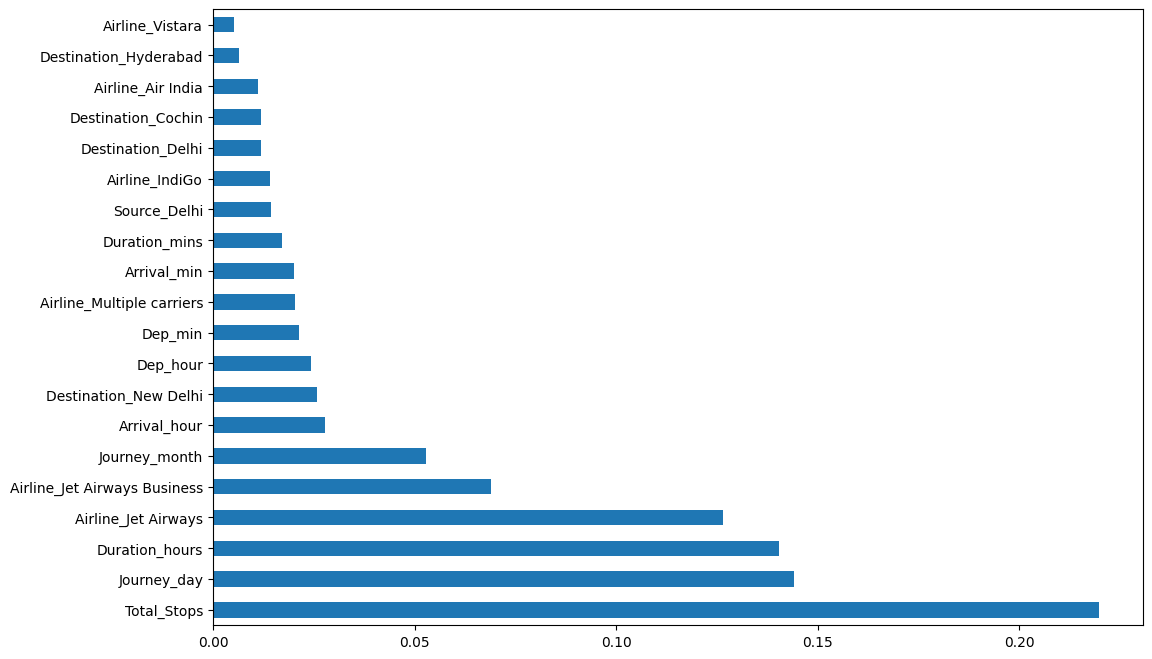

In [72]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection1.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor
from sklearn import metrics
reg = RandomForestRegressor()


In [89]:

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score = metrics.r2_score(y_test,y_pred)
print("R2 Score",r2_score)

R2 Score 0.81188397680158


In [91]:
import pickle
file_name = "flight_rf.pkl"
pickle.dump(reg,open(file_name,'wb'))